In [19]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.integrate as sp
from scipy.interpolate import interp1d
import numdifftools as nd
from findiff import FinDiff

In [20]:
dates, times, flow = np.loadtxt('data/water.csv', unpack = True, usecols = (2, 3, 5), dtype=object)
flow = np.array(flow, dtype=float)
t = np.zeros(dates.size)
for i in range(dates.size):
    d = datetime.strptime(dates[i]+times[i], '%Y-%m-%d%H:%M')
    t[i] = d.timestamp()
start_time = t[0]
t -= start_time

In [21]:
def ys(val, xs=t, ys=flow):
    if len(val) == 1:
        idx = (np.abs(xs - val)).argmin()
        return ys[idx]
    else:
        ids = np.zeros(len(val), dtype=int)
        for i in range(len(val)):
            ids[i] = np.argmin(np.abs(xs - val[i])).astype(int)
        return ys[ids]

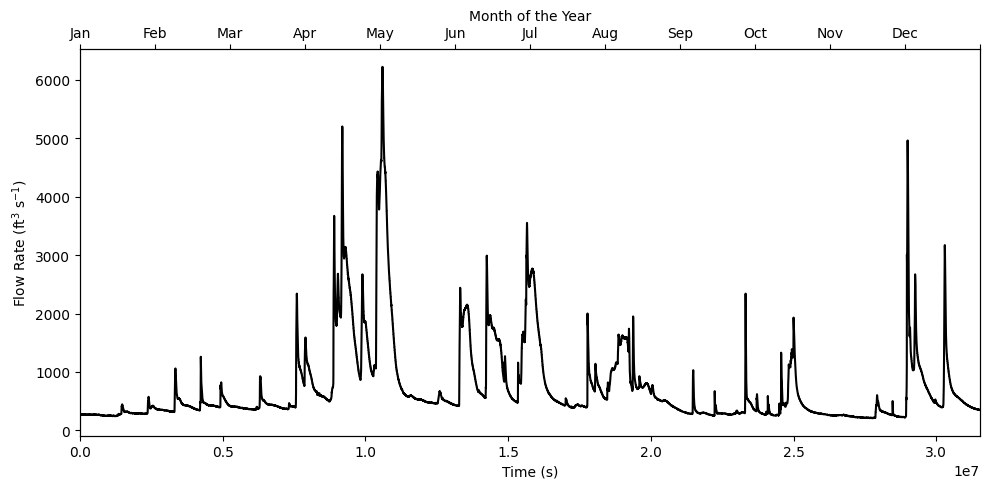

In [7]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(t, flow, 'k')
# tdash = np.linspace(t[0], t[-1], 1000)
# ax.plot(tdash, f(tdash), 'r')
# ax.plot(t[1:], np.diff(flow), 'k')
# ax.plot(t[1:], np.diff(t), 'xk')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
# ax.set_ylim(0, 6400)
ax.set_xlim(0, t[-1])

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(np.linspace(0, t[-1], 13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''])
ax2.set_xlabel('Month of the Year')
plt.tight_layout()
plt.savefig('plots/3/dams.png', dpi=200)

In [ ]:
def d4dt(y,h=1):
    # diffs = (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/h**4
    diffs = np.zeros(len(y))
    for x in range(2, len(y)-2):
        diffs[x] = (y[x+2]-4*y[x+1]+6*y[x]-4*y[x-1]+y[x-2])/h**4
        # diffs[x] = (y[x+1]-y[x-1])/(2*h)
    return diffs#np.average(diffs)



# plt.plot(t1, f1)

# max_error_simpsons, max_error_rectangle, dx
# plt.plot(t, d4dt(flow))

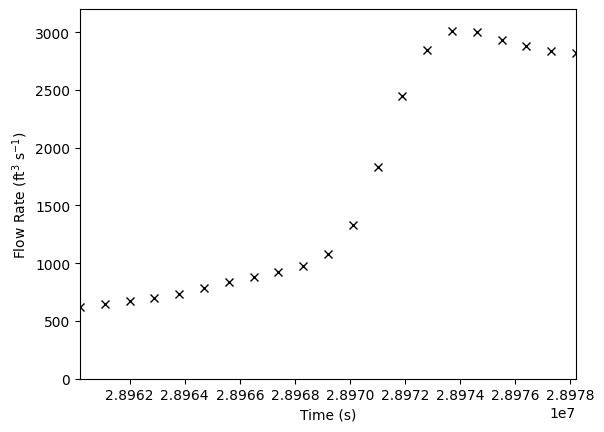

In [69]:
roi = np.where((t>2.896e7) & (t<2.898e7))
f1 = flow[roi][:-1]
t1 = t[roi][:-1]
plt.plot(t1, f1, 'kx', alpha=1)
plt.xlabel('Time (s)')
plt.ylabel('Flow Rate (ft$^3$ s$^{-1}$)')
plt.xlim(t1[0], t1[-1])
plt.ylim(0, 3200)
plt.savefig('plots/3/snippet.png', dpi=200)

t1 = (t1-np.min(t1))
t1 = t1*2/np.max(t1)

h = t1[1]-t1[0]
vmin = np.min(f1)
k = 1
half_step = (k*h)/2

n = len(t1)
dx = t1[1]-t[0]

## Mid-point rule

3307.45

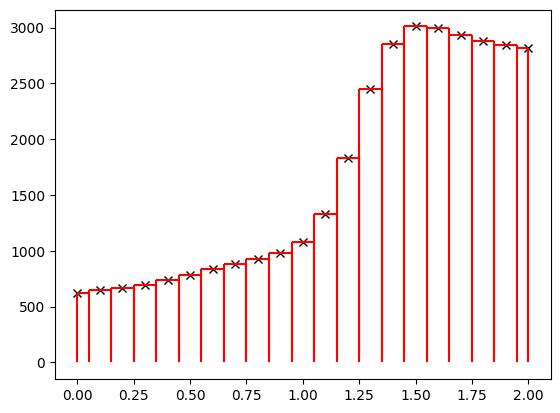

In [70]:
plt.plot(t1, f1, 'kx', alpha=1)
mid_point = 0
mid_point += f1[0]*half_step
plt.vlines(t1[0], ymax=f1[0], ymin=0, color='r')
plt.hlines(f1[0], xmin=t1[0], xmax=t1[0]+half_step, color='r')
# plt.fill_between(0, f1[0], 0, alpha = 0.25, color='b')
for i in range(1,len(t1)-1,k):
    mid_point += f1[i]*half_step*2
    plt.vlines(t1[i]-half_step, ymax=f1[i], ymin=0, color='r')
    plt.vlines(t1[i]+half_step, ymax=f1[i], ymin=0, color='r')
    plt.hlines(f1[i], xmin=t1[i]-half_step, xmax=t1[i]+half_step, color='r')
mid_point += f1[-1]*half_step
plt.vlines(t1[-1], ymax=f1[-1]-half_step, ymin=0, color='r')
plt.vlines(t1[-1], ymax=f1[-1], ymin=0, color='r')
plt.hlines(f1[-1], xmin=t1[-1], xmax=t1[-1]-half_step, color='r')

def d2dt(y,h=1):
    diffs = np.zeros(len(y))
    for x in range(2, len(y)-2):
        diffs[x] = (y[x+1]+y[x-1]-2*ys[x])/(h**2)
    return diffs

f2epsilon = np.max(abs(d4dt(f1)))
max_error_rectangle = ((t1[-1]-t[0]) * f2epsilon * dx**2)/(24)
mid_point

## Trapezoidal

(array([0. , 0.1]), array([625., 646.]))

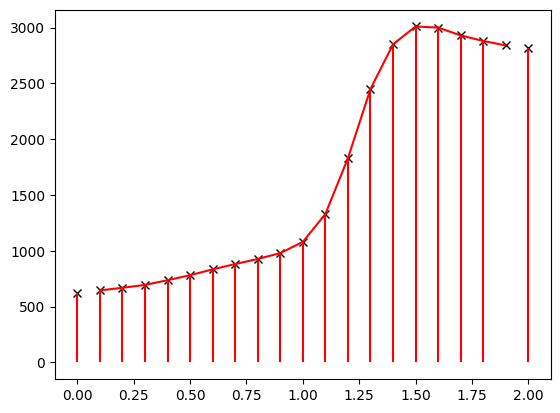

In [71]:
plt.plot(t1, f1, 'kx', alpha=1)
trapezoidal = (dx/2) * (f1[0] + 2*np.sum(f1[1:-1]) + f1[-1])
plt.vlines(t1[0], ymax=f1[0], ymin=0, color='r')
# plt.hlines(f1[0], xmin=t1[0], xmax=t1[0]+half_step, color='r')
# plt.fill_between(0, f1[0], 0, alpha = 0.25, color='b')
for i in range(1,len(t1)-2):
    plt.vlines(t1[i], ymax=f1[i], ymin=0, color='r')
    plt.plot(t1[i:i+2], f1[i:i+2], '-r')
    # plt.vlines(t1[i], ymax=f1[i], ymin=0, color='r')
    # plt.hlines(f1[i], xmin=t1[i]-half_step, xmax=t1[i]+half_step, color='r')

plt.vlines(t1[-1], ymax=f1[-1], ymin=0, color='r')
max_error_trapz = ((t1[-1]-t[0]) * f2epsilon * dx**2)/(12)
t1[0:2],f1[0:0+2]

## Simpsons 1/3

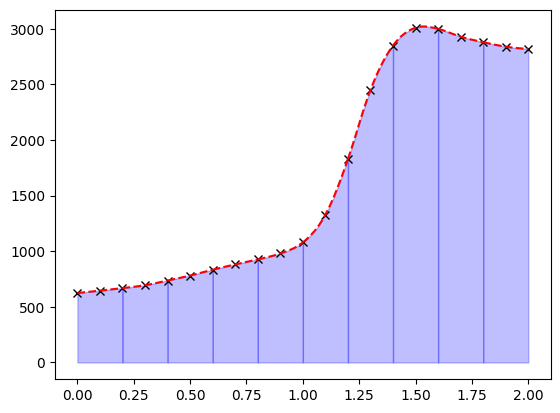

In [72]:
""" simpsons 1/3 """

simpsons_13 = (dx/3) * (f1[0] + 4*np.sum(f1[1:n:2]) + 2*np.sum(f1[2:n-1:2]) + f1[-1])

""" plotting quadratic interpolation"""
plt.plot(t1, f1, 'kx', alpha=1)
quad = interp1d(t1, f1, kind='quadratic')
for j in range(0, len(t1)-2, 2):
    xquad = np.linspace(t1[j], t1[j+2], 25)
    plt.plot(xquad, quad(xquad), '--r')
    plt.fill_between(xquad, quad(xquad), alpha = 0.25, color='b')
# plt.plot(t1[1:n:2], f1[1:n:2], 'x', color='r')
# plt.plot(t1[2:n-1:2], f1[2:n-1:2], 'x', color='r')

f4epsilon = np.max(abs(d4dt(f1)))
max_error_simpsons = ((t1[-1]-t[0]) * f4epsilon * (dx**4))/(180)


## simpsons 3/8

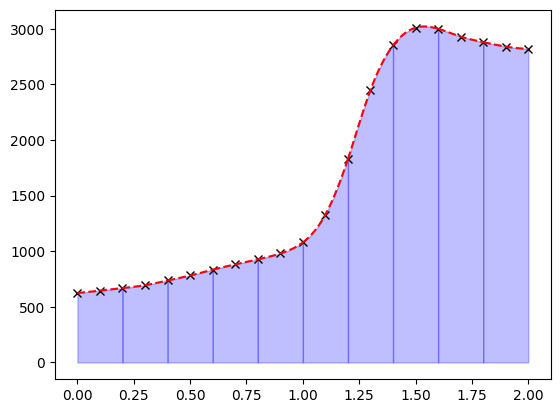

In [73]:
""" simpsons 1/3 """

simpsons_38 = (3*dx/8) * (f1[0] + 3*(np.sum(f1[1:-1:3])+np.sum(f1[2:-1:3])) + 2*np.sum(f1[3:-1:3])+ f1[-1])

""" plotting quadratic interpolation"""
plt.plot(t1, f1, 'kx', alpha=1)
quad = interp1d(t1, f1, kind='cubic')
for j in range(0, len(t1)-2, 2):
    xquad = np.linspace(t1[j], t1[j+2], 25)
    plt.plot(xquad, quad(xquad), '--r')
    plt.fill_between(xquad, quad(xquad), alpha = 0.25, color='b')
# plt.plot(t1[1:n:2], f1[1:n:2], 'x', color='r')
# plt.plot(t1[2:n-1:2], f1[2:n-1:2], 'x', color='r')

# f4epsilon = np.max(abs(d4dt(f1)))
max_error_simpsons38 = ((t1[-1]-t[0]) * f4epsilon * (dx**4))/(80)


# Results

In [74]:
print(f'Mid-point: {mid_point} ± {max_error_rectangle}')
print(f'Trapezoidal: {trapezoidal} ± {max_error_trapz}')
print(f'Simpsons 1/3: {simpsons_13} ± {max_error_simpsons}')
print(f'Simpsons 1/3: {simpsons_38} ± {max_error_simpsons38}')
sp.simpson(f1, t1, dx = dx), len(t1), sp.cumulative_trapezoid(f1, t1, dx=dx, initial=0)[-1]

Mid-point: 3307.45 ± 0.2666666666666667
Trapezoidal: 3307.4500000000003 ± 0.5333333333333334
Simpsons 1/3: 3307.9666666666667 ± 0.0003555555555555556
Simpsons 1/3: 3272.7000000000003 ± 0.0008000000000000001


(3307.9666666666667, 21, 3307.45)

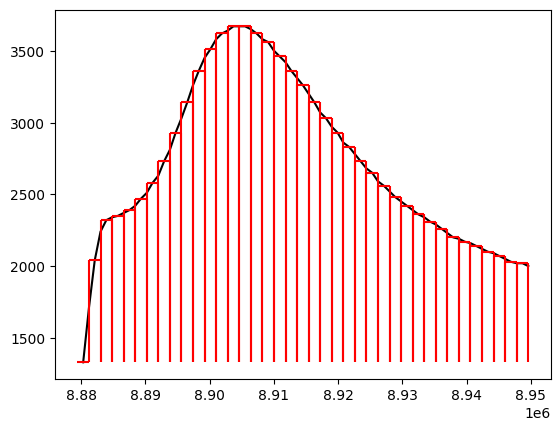

In [144]:
roi = np.where((t>0.888e7) & (t<0.895e7))
t1 = t[roi]
f1 = flow[roi]
plt.plot(t1, f1, 'k')

h = t1[1]-t1[0]
vmin = np.min(f1)
k = 2
half_step = (k*h)/2
for i in range(0,len(t1),k):
    plt.vlines(t1[i]-half_step, ymax=f1[i], ymin=vmin, color='r')
    if i != len(t1) - 1:
        plt.vlines(t1[i]+half_step, ymax=f1[i], ymin=vmin, color='r')
        plt.hlines(f1[i], xmin=t1[i]-half_step, xmax=t1[i]+half_step, color='r')


select a region to work in 

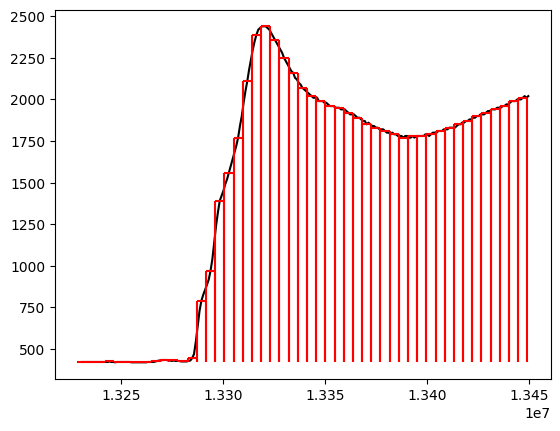

In [145]:
roi = np.where((t>1.323e7) & (t<1.345e7))
t1 = t[roi]
f1 = flow[roi]
plt.plot(t1, f1, 'k')

h = t[1]-t[0]
vmin = np.min(f1)
k = 5
half_step = (k*h)/2
for i in range(0,len(t1),k):
    plt.vlines(t1[i]-half_step, ymax=f1[i], ymin=vmin, color='r')
    if i != len(t1) - 1:
        plt.vlines(t1[i]+half_step, ymax=f1[i], ymin=vmin, color='r')
        plt.hlines(f1[i], xmin=t1[i]-half_step, xmax=t1[i]+half_step, color='r')


In [146]:
def rectangle(f,a,b,n):
    h = (b-a)/(n-1)
    xs = a + np.arange(n-1)*h
    fs = f(xs)
    return h*np.sum(fs)

In [147]:
c = 0
for i in range(len(flow)-1):
    c += flow[i]*(t[i+1]-t[i])
d=sp.simpson(flow, t)
e=sp.trapezoid(flow, t)

In [148]:
c, d, e

(23233775400.0, 23233431037.5, 23233843800.0)

In [149]:
c-d, c-e

(344362.5, -68400.0)

(array([269., 272., 269.]),
 array([180000., 180900., 181800.]),
 487800.0,
 486900.0)

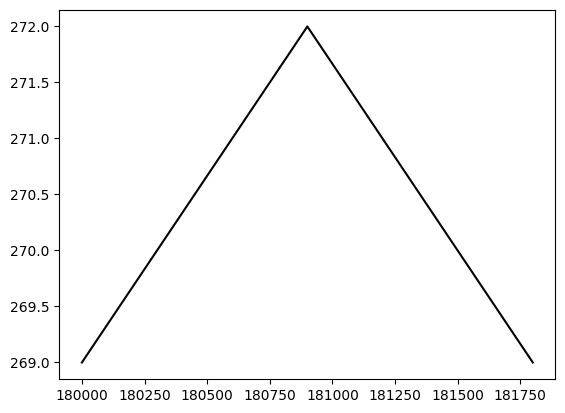

In [ ]:
ys=sp.simpson(flow[200:203],t[200:203])
g=sp.trapezoid(flow[200:203],t[200:203])
plt.plot(t[200:203], flow[200:203], 'k')
flow[200:203],t[200:203], ys,g
# plt.ylim(0, 300)

$$O(h^5)$$


In [151]:
a = - flow.size + 2**16
flow1 = np.concatenate((flow, np.zeros(a+1)))
# flow.shape, 2**16
sp.romb(flow1, t)

array([0.00000000e+00, 2.32069743e+10, 4.64139487e+10, ...,
       8.13079553e+14, 8.13102760e+14, 8.13125966e+14])

### Integration

$$
f(t)\\W(T)
$$

$$
f(t) = \frac{dW}{dt}
$$

$$
\implies W(T) = \int_0^T f(t)dt
$$

In [152]:
s = 0
